# GRIP : The Sparks Foundation
## Data Science and Business Analytics intern
### Author : Kona Bindu Harshitha
### Task 1 : Prediction Using Supervised ML
In this task we have to predict the percentage of a student based on their number of hours studied.The task consists of two variables no. of hours studied and the percentage score. This can be solved using Linear Regression

In [5]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data

In [6]:
#READING DATA
url = "http://bit.ly/w-data"
data=pd.read_csv(url)

### Exploring data

In [7]:
print(data.shape)

(25, 2)


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.tail(15)

,Hours,Scores
10,7.7,85
11,5.9,62
12,4.5,41
13,3.3,42
14,1.1,17
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69


In [7]:
print(len(data))

25


In [8]:
data.tail(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see we do not have any null values we can proceed further.

### Visualizing the data

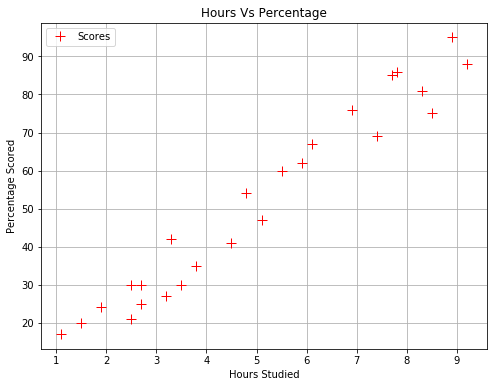

In [10]:
# Plotting the data set
plt.rcParams["figure.figsize"]=[8,6]
data.plot(x="Hours",y="Scores",style="+",color="red",markersize=10)
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

From the above graph we can observe that there is a linear relationship between the no. of hours studied and percentage scored.Hence we can use linear regression model to predict further values.

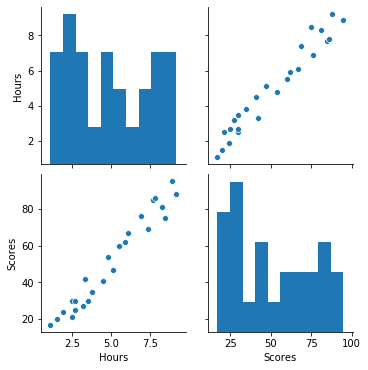

In [12]:
sns.pairplot(data)

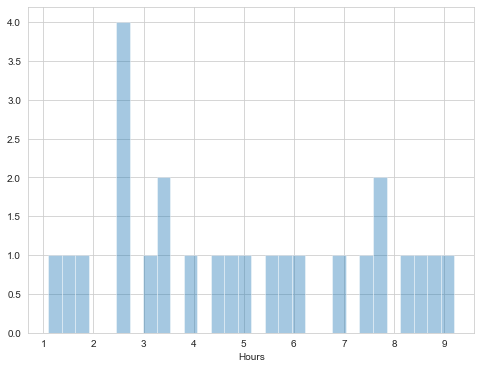

In [29]:
sns.set_style('whitegrid')
sns.distplot(data['Hours'],kde=False,bins=30)

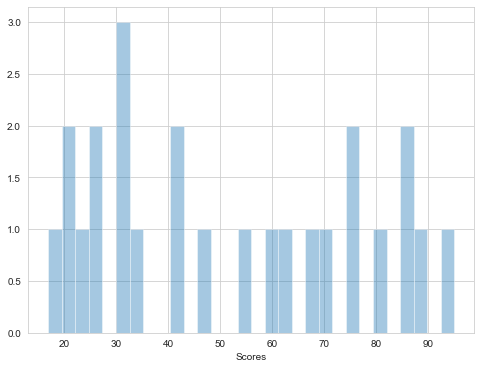

In [33]:
sns.set_style('whitegrid')
sns.distplot(data['Scores'],kde=False,bins=30)

### Data Preparation

In [31]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
# using iloc function we will divide the data
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [13]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [18]:
#DIVIDING TRAIN AND TEST VALUES IN 70:30 RESPECTIVELY
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=101)

In [22]:
x_train

array([[4.8],
       [3.2],
       [8.5],
       [5.1],
       [1.1],
       [6.1],
       [2.5],
       [4.5],
       [1.5],
       [6.9],
       [2.7],
       [3.5],
       [8.3],
       [3.3],
       [2.7],
       [8.9],
       [7.8],
       [9.2],
       [1.9],
       [5.9]])

In [23]:
x_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5]])

In [24]:
y_train

array([54, 27, 75, 47, 17, 67, 21, 41, 20, 76, 30, 30, 81, 42, 25, 95, 86,
       88, 24, 62], dtype=int64)

In [25]:
y_test

array([30, 85, 35, 69, 60], dtype=int64)

### Training the Algorithm

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training has been finished")

Training has been finished


### Visualize the Model

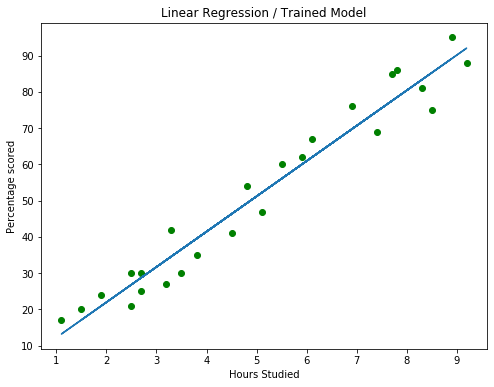

In [20]:
line=regressor.coef_*x+regressor.intercept_
plt.title("Linear Regression / Trained Model")
plt.scatter(x, y,color='green')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage scored")
plt.plot(x, line);
plt.show()

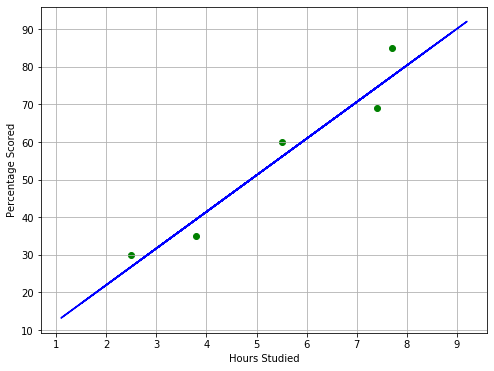

In [24]:
plt.scatter(x_test,y_test,color="green")
plt.plot(x,line,color="blue")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

### Making Predictions

In [21]:
print(x_test)
y_pred=regressor.predict(x_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [32]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


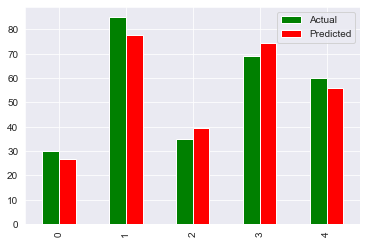

In [39]:
df.plot(kind='bar',color=['green','red'])
plt.show()

In [25]:
hours=[[9.25]]
pred=regressor.predict(hours)
print("Predicted Score =",pred[0])

Predicted Score = 92.5452195402996


### Evaluating the Model

In [26]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.937597792467705
